In [6]:
pip install -U finance-datareader

In [7]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [10]:
import FinanceDataReader as fdr
fdr.DataReader('005390', start = '2015', end = '2024')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,1360,1375,1340,1370,681812,0.007353
2015-01-05,1365,1380,1335,1380,834876,0.007299
2015-01-06,1370,1385,1350,1360,445431,-0.014493
2015-01-07,1360,1370,1305,1310,1037801,-0.036765
2015-01-08,1310,1335,1305,1320,529128,0.007634
...,...,...,...,...,...,...
2023-12-21,1865,1872,1847,1864,239985,-0.000536
2023-12-22,1857,1867,1785,1810,959494,-0.028970
2023-12-26,1808,1833,1808,1832,416410,0.012155


In [100]:
  df = fdr.DataReader('005930', start = '2020' ).reset_index()

In [101]:
df

,Date,Open,High,Low,Close,Volume,Change
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...,...
983,2023-12-22,75800,76300,75400,75900,14515608,0.012000
984,2023-12-26,76100,76700,75700,76600,13164909,0.009223
985,2023-12-27,76700,78000,76500,78000,20651042,0.018277
986,2023-12-28,77700,78500,77500,78500,17797536,0.006410


In [102]:
def add_bollinger_bands(df, window=20, num_std=2):
    # 10일 이동평균
    df['MA10'] = df['Close'].rolling(window=10).mean()

    # 볼린저 밴드 상단, 중간, 하단 계산
    df['UpperBand'] = df['MA10'] + (df['Close'].rolling(window=window).std() * num_std)
    df['MiddleBand'] = df['MA10']
    df['LowerBand'] = df['MA10'] - (df['Close'].rolling(window=window).std() * num_std)

    return df
# 볼린저 밴드와 이동평균 추가
df = add_bollinger_bands(df)

# 결과 확인
print(df.head(20))

         Date   Open   High    Low  Close    Volume    Change     MA10  \
0  2020-01-02  55500  56000  55000  55200  12993228 -0.010753      NaN   
1  2020-01-03  56000  56600  54900  55500  15422255  0.005435      NaN   
2  2020-01-06  54900  55600  54600  55500  10278951  0.000000      NaN   
3  2020-01-07  55700  56400  55600  55800  10009778  0.005405      NaN   
4  2020-01-08  56200  57400  55900  56800  23501171  0.017921      NaN   
5  2020-01-09  58400  58600  57400  58600  24102579  0.031690      NaN   
6  2020-01-10  58800  59700  58300  59500  16000170  0.015358      NaN   
7  2020-01-13  59600  60000  59100  60000  11359139  0.008403      NaN   
8  2020-01-14  60400  61000  59900  60000  16906295  0.000000      NaN   
9  2020-01-15  59500  59600  58900  59000  14300928 -0.016667  57590.0   
10 2020-01-16  59100  60700  59000  60700  14381774  0.028814  58140.0   
11 2020-01-17  61900  62000  61000  61300  16025661  0.009885  58720.0   
12 2020-01-20  62000  62800  61700  62

In [103]:
df = df.drop(df.index[:19])


In [ ]:
#삼성전자 예측

In [15]:
import multiprocessing
multiprocessing.cpu_count()

2

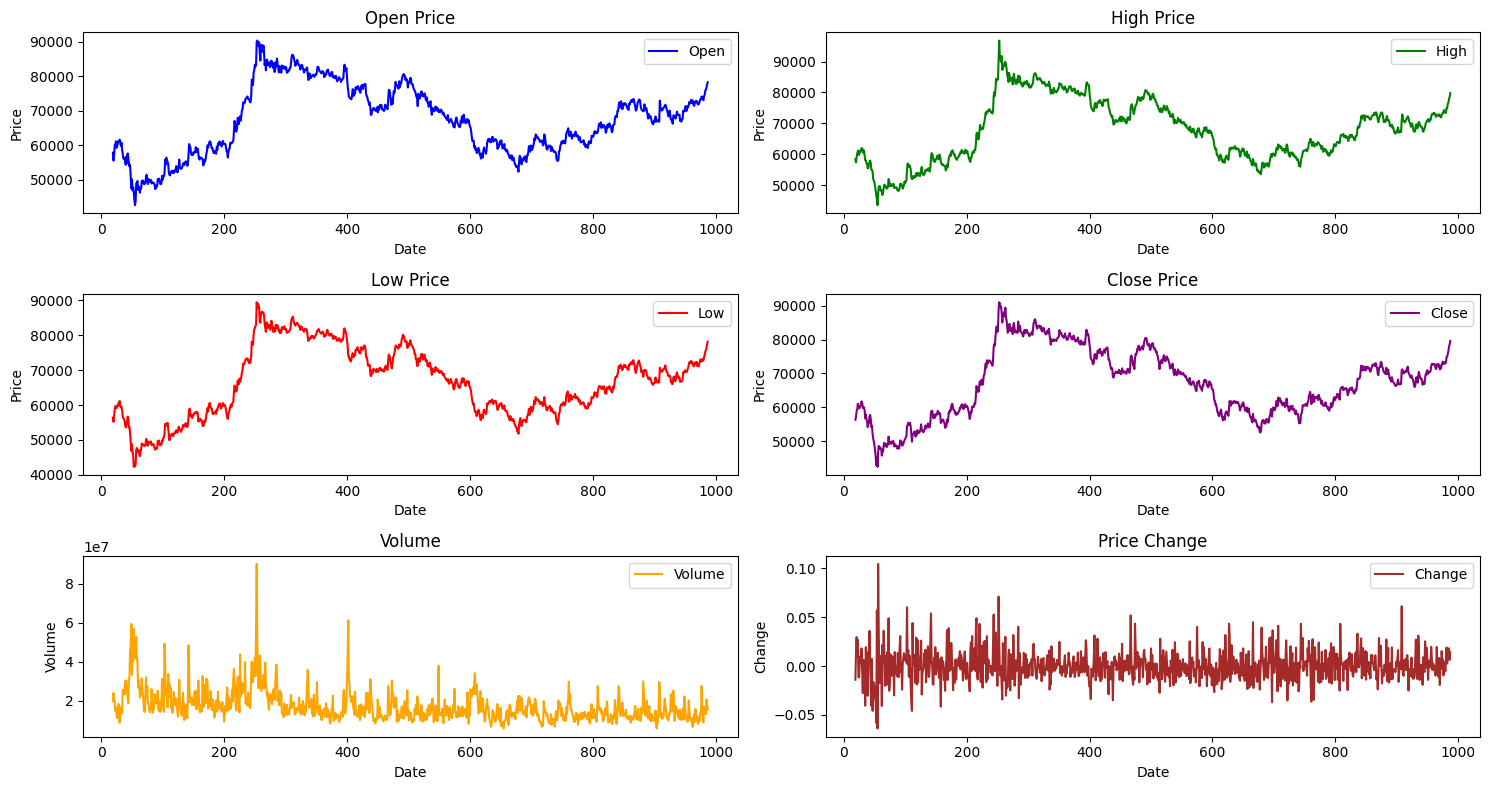

In [104]:
import matplotlib.pyplot as plt


# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(3, 2, 1)
plt.plot(df.index, df['Open'], label='Open', color='blue')
plt.title('Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df.index, df['High'], label='High', color='green')
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df.index, df['Close'], label='Close', color='purple')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df.index, df['Volume'], label='Volume', color='orange')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df.index, df['Change'], label='Change', color='brown')
plt.title('Price Change')
plt.xlabel('Date')
plt.ylabel('Change')
plt.legend()


plt.tight_layout()
plt.show()

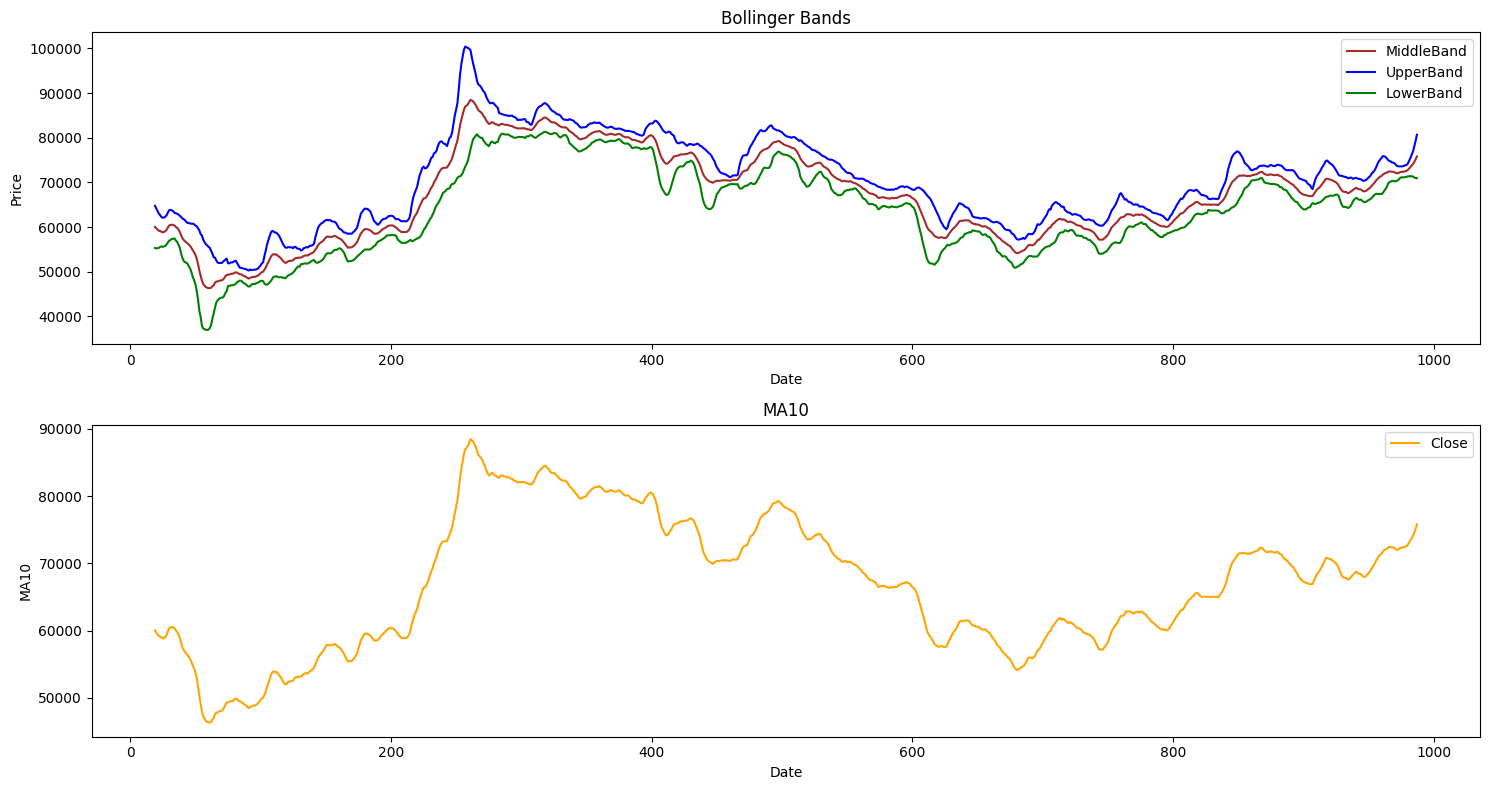

In [106]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['MiddleBand'], label='MiddleBand', color='brown')
plt.plot(df.index, df['UpperBand'], label='UpperBand', color='blue')
plt.plot(df.index, df['LowerBand'], label='LowerBand', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['MA10'], label='Close', color='orange')
plt.title('MA10')
plt.xlabel('Date')
plt.ylabel('MA10')
plt.legend()

plt.tight_layout()
plt.show()

In [107]:
df

,Date,Open,High,Low,Close,Volume,Change,MA10,UpperBand,MiddleBand,LowerBand
19,2020-01-31,57800,58400,56400,56400,19749457,-0.013986,60040.0,64751.140213,60040.0,55328.859787
20,2020-02-03,55500,57400,55200,57200,23995260,0.014184,59690.0,64156.612987,59690.0,55223.387013
21,2020-02-04,57100,59000,56800,58900,21800192,0.029720,59450.0,63618.187793,59450.0,55281.812207
22,2020-02-05,60000,60200,58900,59500,19278165,0.010187,59160.0,62972.596850,59160.0,55347.403150
23,2020-02-06,60100,61100,59700,61100,14727159,0.026891,59130.0,62648.073636,59130.0,55611.926364
...,...,...,...,...,...,...,...,...,...,...,...
983,2023-12-22,75800,76300,75400,75900,14515608,0.012000,73770.0,76186.957635,73770.0,71353.042365
984,2023-12-26,76100,76700,75700,76600,13164909,0.009223,74130.0,76922.829164,74130.0,71337.170836
985,2023-12-27,76700,78000,76500,78000,20651042,0.018277,74580.0,78085.844744,74580.0,71074.155256
986,2023-12-28,77700,78500,77500,78500,17797536,0.006410,75150.0,79289.870326,75150.0,71010.129674


In [108]:
df['BandWidth'] = df['UpperBand'] - df['LowerBand']

In [ ]:
#진짜 모델

Epoch 1/50
64/64 [==============================] - 4s 15ms/step - loss: 0.0165 - val_loss: 0.0018
Epoch 2/50
64/64 [==============================] - 0s 6ms/step - loss: 9.0459e-04 - val_loss: 0.0011
Epoch 3/50
64/64 [==============================] - 0s 6ms/step - loss: 8.8433e-04 - val_loss: 7.3625e-04
Epoch 4/50
64/64 [==============================] - 0s 7ms/step - loss: 7.7957e-04 - val_loss: 6.6692e-04
Epoch 5/50
64/64 [==============================] - 0s 6ms/step - loss: 7.3518e-04 - val_loss: 4.7187e-04
Epoch 6/50
64/64 [==============================] - 0s 6ms/step - loss: 7.1279e-04 - val_loss: 4.9084e-04
Epoch 7/50
64/64 [==============================] - 0s 6ms/step - loss: 6.6345e-04 - val_loss: 4.1694e-04
Epoch 8/50
64/64 [==============================] - 0s 6ms/step - loss: 6.3137e-04 - val_loss: 4.4767e-04
Epoch 9/50
64/64 [==============================] - 0s 6ms/step - loss: 6.2525e-04 - val_loss: 3.8845e-04
Epoch 10/50
64/64 [==============================] - 0s 6

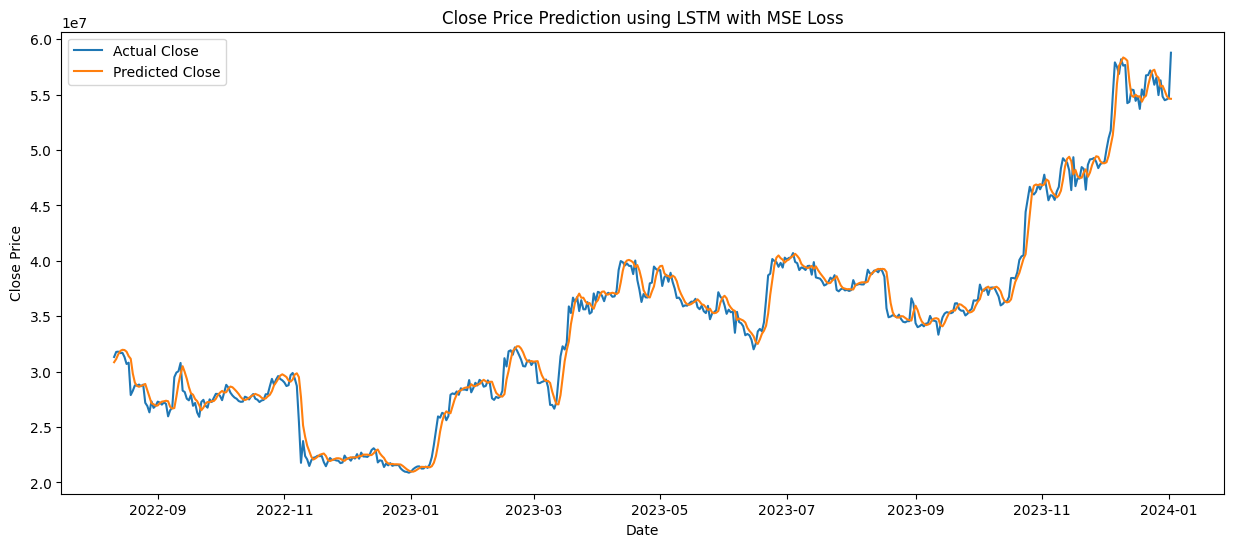

In [93]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, LSTM, Dense, concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import pandas as pd


# 데이터 정규화
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()

scaled_close = scaler_close.fit_transform(df[['Close']])
scaled_volume = scaler_volume.fit_transform(df[['Volume']])

# 데이터 전처리
timesteps = 10  # 시계열 데이터의 타임 스텝 수
features_close = 1  # Close 열의 특성 수
features_volume = 1  # Volume 열의 특성 수

X_close, y_close = [], []

for i in range(len(scaled_close) - timesteps):
    X_close.append(scaled_close[i:i + timesteps, 0])
    y_close.append(scaled_close[i + timesteps, 0])

X_close, y_close = np.array(X_close), np.array(y_close)

X_volume, y_volume = [], []

for i in range(len(scaled_volume) - timesteps):
    X_volume.append(scaled_volume[i:i + timesteps, 0])
    y_volume.append(scaled_volume[i + timesteps, 0])

X_volume, y_volume = np.array(X_volume), np.array(y_volume)

# 데이터 분할
X_close_train, X_close_test, y_close_train, y_close_test = train_test_split(X_close, y_close, test_size=0.2, shuffle=False)
X_volume_train, X_volume_test, y_volume_train, y_volume_test = train_test_split(X_volume, y_volume, test_size=0.2, shuffle=False)

# 모델 정의
input_close = Input(shape=(timesteps, features_close))
lstm_close = LSTM(50)(input_close)

input_volume = Input(shape=(timesteps, features_volume))
lstm_volume = LSTM(50)(input_volume)

merged = concatenate([lstm_close, lstm_volume])
output_close = Dense(1)(merged)

model = Model(inputs=[input_close, input_volume], outputs=output_close)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit([X_close_train, X_volume_train], y_close_train, epochs=50, batch_size=32,
                    validation_data=([X_close_test, X_volume_test], y_close_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate([X_close_test, X_volume_test], y_close_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict([X_close_test, X_volume_test])

# 정규화된 예측값을 역정규화
predictions = scaler_close.inverse_transform(predictions.reshape(-1, 1))
y_close_test_actual = scaler_close.inverse_transform(y_close_test.reshape(-1, 1))

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_close_test_actual, label='Actual Close')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Close')
plt.title('Close Price Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Epoch 1/50
29/29 [==============================] - 8s 51ms/step - loss: 0.0843 - val_loss: 0.0059
Epoch 2/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0081 - val_loss: 0.0025
Epoch 3/50
29/29 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 4/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 5/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 6/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0025
Mean Squared Error: 0.0024786810390651226
2/2 [==============================] - 2s 14ms/step


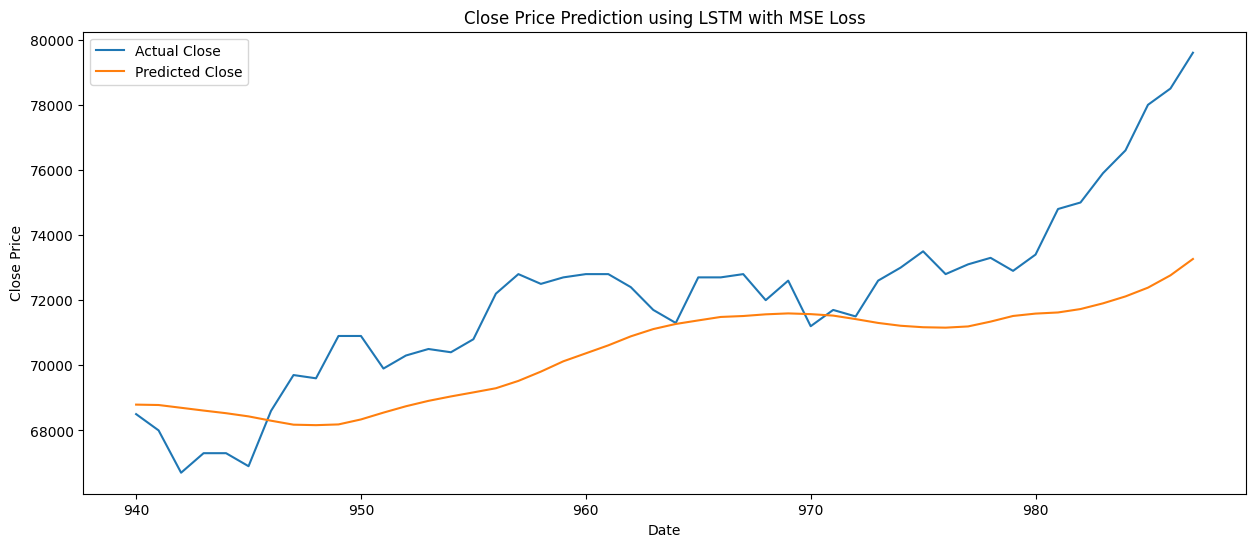

In [110]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, LSTM, Dense, concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리
scaler_close = MinMaxScaler()
scaler_volume = MinMaxScaler()
scaler_ma10 = MinMaxScaler()
scaler_bandwidth = MinMaxScaler()

scaled_close = scaler_close.fit_transform(df[['Close']])
scaled_volume = scaler_volume.fit_transform(df[['Volume']])
scaled_ma10 = scaler_ma10.fit_transform(df[['MA10']])
scaled_bandwidth = scaler_bandwidth.fit_transform(df[['BandWidth']])

# 데이터 전처리 함수
def preprocess_data(data, timesteps):
    X, y = [], []

    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps, 0])
        y.append(data[i + timesteps, 0])

    return np.array(X), np.array(y)

# 시계열 데이터의 타임 스텝 수
timesteps = 10

# Close 데이터 전처리
X_close, y_close = preprocess_data(scaled_close, timesteps)

# Volume 데이터 전처리
X_volume, y_volume = preprocess_data(scaled_volume, timesteps)

# MA10 데이터 전처리
X_ma10, y_ma10 = preprocess_data(scaled_ma10, timesteps)

# BandWidth 데이터 전처리
X_bandwidth, y_bandwidth = preprocess_data(scaled_bandwidth, timesteps)

# 데이터 분할
X_close_train, X_close_test, y_close_train, y_close_test = train_test_split(X_close, y_close, test_size=0.05, shuffle=False)
X_volume_train, X_volume_test, y_volume_train, y_volume_test = train_test_split(X_volume, y_volume, test_size=0.05, shuffle=False)
X_ma10_train, X_ma10_test, y_ma10_train, y_ma10_test = train_test_split(X_ma10, y_ma10, test_size=0.05, shuffle=False)
X_bandwidth_train, X_bandwidth_test, y_bandwidth_train, y_bandwidth_test = train_test_split(X_bandwidth, y_bandwidth, test_size=0.05, shuffle=False)

# 모델 정의
input_close = Input(shape=(timesteps, 1))
lstm_close = LSTM(50)(input_close)

input_volume = Input(shape=(timesteps, 1))
lstm_volume = LSTM(50)(input_volume)

input_ma10 = Input(shape=(timesteps, 1))
lstm_ma10 = LSTM(50)(input_ma10)

input_bandwidth = Input(shape=(timesteps, 1))
lstm_bandwidth = LSTM(50)(input_bandwidth)

merged = concatenate([lstm_close, lstm_volume, lstm_ma10, lstm_bandwidth])
output = Dense(1)(merged)

model = Model(inputs=[input_close, input_volume, input_ma10, input_bandwidth], outputs=output)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit([X_close_train, X_volume_train, X_ma10_train, X_bandwidth_train], y_close_train,
                    epochs=50, batch_size=32,
                    validation_data=([X_close_test, X_volume_test, X_ma10_test, X_bandwidth_test], y_close_test),
                    callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate([X_close_test, X_volume_test, X_ma10_test, X_bandwidth_test], y_close_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict([X_close_test, X_volume_test, X_ma10_test, X_bandwidth_test])

# 정규화된 예측값을 역정규화
predictions = scaler_close.inverse_transform(predictions.reshape(-1, 1))
y_close_test_actual = scaler_close.inverse_transform(y_close_test.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(df.index[-len(predictions):], y_close_test_actual, label='Actual Close')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Close')
plt.title('Close Price Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()